In [6]:
import tensorflow as tf
import qriemannopt as qro
import matplotlib.pyplot as plt

In [7]:
# isometric variable
q = tf.complex(tf.random.normal((1, 10, 3), dtype=tf.float64),
               tf.random.normal((1, 10, 3), dtype=tf.float64))
q, _ = tf.linalg.qr(q)
q = tf.Variable(tf.concat([tf.math.real(q)[..., tf.newaxis],
                           tf.math.imag(q)[..., tf.newaxis]], axis=-1))

# hamiltonian
H = tf.complex(tf.random.normal((10, 10), dtype=tf.float64),
               tf.random.normal((10, 10), dtype=tf.float64))
H = 0.5 * (H + tf.linalg.adjoint(H))

# min of loss function
min_value = tf.cast(tf.reduce_sum(tf.linalg.eigvalsh(H)[:3]),
                   dtype=tf.float64)

# riemannian optimizaer
opt = qro.StiefelSGD()

In [8]:
# training loop
losses = []
for _ in range(1000):
    with tf.GradientTape() as tape:
        Z = tf.complex(q[..., 0], q[..., 1])[0]
        loss = tf.cast(tf.linalg.trace(tf.linalg.adjoint(Z) @ H @ Z),
                      dtype=tf.float64)
        losses.append(loss - min_value)
    grad = tape.gradient(loss, q)
    opt.apply_gradients(zip([grad], [q]))

Text(0, 0.5, 'err')

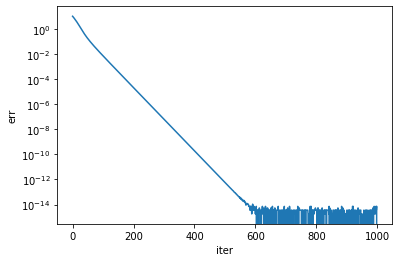

In [9]:
plt.plot(losses)
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('err')